# Some Git Stuff

In [1]:
!git config --global user.email "ltskar009@myuct.ac.za"

In [2]:
!git remote add origin https://github.com/KaraboLetsholo/Alpha-Decay.git

error: remote origin already exists.


In [3]:
!git push origin main

Everything up-to-date


In [5]:
!git add .

In [6]:
!git push

Everything up-to-date


# Importing Modules

These are the modules or libraries we need to analyse that data and make conclusions.

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from scipy.optimize import curve_fit

# Read-in Data from txt Files

We will use np.loadtxt("filename.txt", *params) from numpy to read in our data file and convert the columns into arrays

In [9]:
# Reading in the data from txt file
data = np.loadtxt("data.txt")
ch = np.array(data[:,0]) # first column is channel numbers
x = np.array(data[:,1]) # second column is the counts

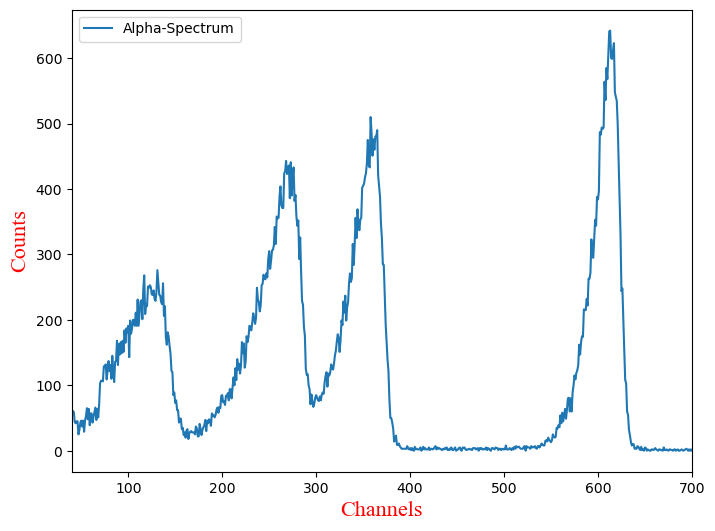

In [10]:
fig, ax = plt.subplots(1,1, figsize=(8,6))
plt.xlim(40,700)

ax.errorbar(ch, x, xerr=None, yerr=None, label='Alpha-Spectrum')
ax.set_xlabel("Channels", font='Times New Roman', fontsize=16, color="red")
ax.set_ylabel("Counts", font='Times New Roman', fontsize=16, color="red")
plt.legend()
plt.show()

# Fitting Peak Data

Now that we have our data, we can fit a Gaussian to each peak and obtain the mean and standard deviation, to do this, we need to use curve_fit() for all four peak,
that's redundant that's why we'll use a method and loop through each peak.

In [11]:
# Initial Guesses
p0 = [[600, 600,30], [500, 340, 20], [420, 255, 26], [285, 135, 20]]

In [12]:
pk_x = [ch[550:660], ch[290:400], ch[155:290], ch[50:155]]
pk_y = [x[550:660], x[290:400], x[155:290], x[50:155]]

In [13]:
def f(x, a, b, c):
    return a*np.exp(-((x-b)**2)/2*c)

In [14]:
popt_f, perr_f = [], []
for i in range(4):
    popt, perr = curve_fit(f, pk_x[i], pk_y[i], p0=p0[i])
    popt_f.append(popt)
    perr_f.append(perr)

C:\Users\Karabo\AppData\Local\Temp\ipykernel_12916\3587240055.py:2: RuntimeWarning: overflow encountered in exp
  return a*np.exp(-((x-b)**2)/2*c)


# Visualising the Fitted Data

We're gonna use matplotlib to analyse our Guassian fits

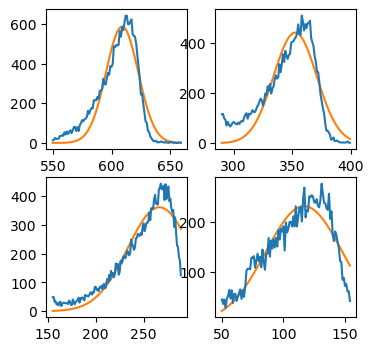

In [15]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(4,4))

ax1.errorbar(pk_x[0], pk_y[0], xerr=None, yerr=None, label='First Peak')
ax1.plot(pk_x[0], f(pk_x[0], *popt_f[0]), label='Fitted Gaussian')

ax2.errorbar(pk_x[1], pk_y[1], xerr=None, yerr=None, label='Second Peak')
ax2.plot(pk_x[1], f(pk_x[1], *popt_f[1]), label='Fitted Gaussian')

ax3.errorbar(pk_x[2], pk_y[2], xerr=None, yerr=None, label='Third Peak')
ax3.plot(pk_x[2], f(pk_x[2], *popt_f[2]), label='Fitted Gaussian')

ax4.errorbar(pk_x[3], pk_y[3], xerr=None, yerr=None, label='Fourth Peak')
ax4.plot(pk_x[3], f(pk_x[3], *popt_f[3]), label='Fitted Gaussian')


# Calibration and Error Analysis

Now that we have our data, we'll do some error and calibrate our energy curve.

In [16]:
pk = []
pk_U = []
pk_U_err = []
for i in range(4):
    pk.append(popt_f[i][1])
    pk_U.append(popt_f[i][2])
    pk_U_err.append(np.sqrt(np.trace(perr_f[i]**2)))
pk = np.sort(pk)
pk_U = np.sort(pk_U)
pk_U_err = np.sort(pk_U_err)

In [34]:
E = [4870.75, 5590.4, 6114.75, 2692]
U_E = [0.0025, 0.03, 0.009, 200]
E = np.sort(E)
U_E = np.sort(U_E)

In [35]:
def Linear(x, a, b):
    return a*x + b

In [36]:
l0 = [5, 2500]

lopt, lerr = curve_fit(Linear, pk, E, p0=l0)
y = Linear(pk, *lopt)

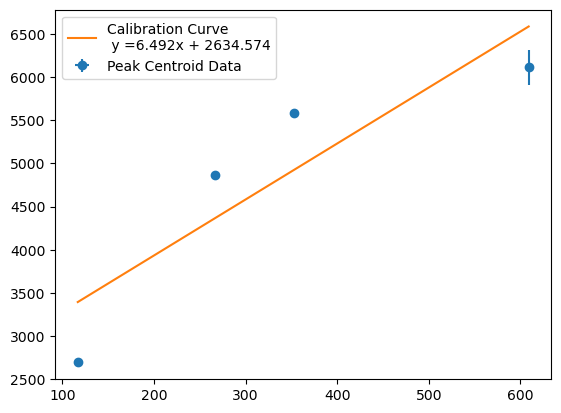

In [37]:
plt.errorbar(pk, E, xerr=pk_U, yerr=U_E, fmt='o', label='Peak Centroid Data')
plt.plot(pk, y, label='Calibration Curve\n y =' + str(round(lopt[0],3)) + "x + " + str(round(lopt[1],3)))
plt.legend(loc='upper left')

In [38]:
e0 = [1, 1000]

eopt, eerr = curve_fit(Linear, U_E, pk, p0=e0)

In [39]:
eopt

array([  1.81937339, 245.17764811])

# Resolution

In [46]:
FHWM = 2.355*popt_f[1][2]

In [50]:
FHWM # Resolution

0.006974979670857037

In [49]:
FHWM*100

0.6974979670857037

# Plotting the Energy Spectrum

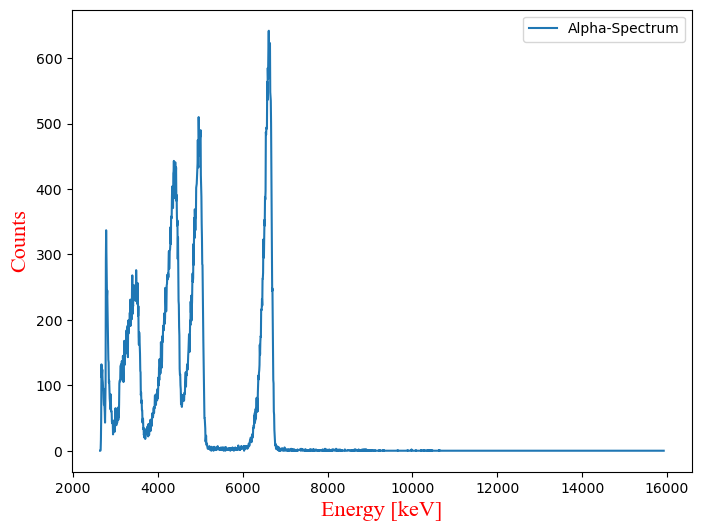

In [54]:
E_f = Linear(ch, *lopt)

fig, ax = plt.subplots(1,1, figsize=(8,6))
#plt.xlim(40,700)

ax.errorbar(E_f, x, xerr=None, yerr=None, label='Alpha-Spectrum')
ax.set_xlabel("Energy [keV]", font='Times New Roman', fontsize=16, color="red")
ax.set_ylabel("Counts", font='Times New Roman', fontsize=16, color="red")
plt.legend()
plt.show()